<a href="https://colab.research.google.com/github/Carlygarciap/Proyecto-Deep-Learning/blob/main/02_arquitectura_de_linea_de_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<font color="green">**PROYECTO DEEP LEARNING**</font>

**Carlos Mario García Peña**

**Estudiante de Maestría en Ingeniería**

**Curso: Fundamento de Deep Learning**


##<font color="green">**Introducción**</font>

Actualmente, el planeta enfrenta cambios ambientales significativos, principalmente debido a la contaminación provocada por los gases de efecto invernadero. El sector del transporte desempeña un papel crucial en esta contribución a la degradación ambiental, lo que ha impulsado la necesidad de desarrollar estrategias para mitigar los efectos de estas emisiones.
Para abordar este desafío, han surgido iniciativas centradas en la movilidad sostenible, como los vehículos eléctricos de dos ruedas, que incluyen bicicletas eléctricas, patinetas y otros medios de transporte ecológicos. Estos vehículos buscan fomentar un estilo de vida más responsable con el medio ambiente, promoviendo opciones de transporte que reduzcan la huella de carbono y ayuden a disminuir los efectos de la contaminación.
Sin embargo, uno de los problemas más relevantes que enfrentan estos vehículos sostenibles es el desgaste de sus componentes, especialmente los motores eléctricos y las baterías. Estos elementos son propensos a fallas y representan un reto en términos de confiabilidad y mantenimiento.
Este estudio se enfoca en la evaluación de estos componentes, con el objetivo de predecir el estado de las fallas de los motores eléctricos y las baterías en vehículos de movilidad sostenible. La capacidad de anticipar fallas permitirá tomar medidas preventivas y mejorar la eficiencia y durabilidad de estos medios de transporte, contribuyendo a un futuro más sostenible.


In [ ]:
# agregamos imagen
from IPython.display import Image
Image(url='https://i.ytimg.com/vi/z8MV6Wm2DLc/hq720.jpg?sqp=-oaymwE7CK4FEIIDSFryq4qpAy0IARUAAAAAGAElAADIQj0AgKJD8AEB-AH-CYAC0AWKAgwIABABGGsgayhrMA8=&rs=AOn4CLBWzxs3in1_4RyVFjfnl2rGArXOSw')

##<font color="green">**Objetivos del Modelamiento**</font>

Desarrollar un modelo predictivo que permita determinar el estado de salud de los componentes críticos en un motor eléctrico trifásico. Para ello, se busca utilizar variables que influyan en el desempeño del motor y que, de alguna manera, reflejen su estado de salud. El enfoque inicial es implementar un modelo de red neuronal Long Short Term Memory (LSTM) que ayude a predecir el estado del motor en dos categorías: funcionamiento normal o en estado de falla. Este modelo se basa en el análisis de variables cuantitativas que describen el comportamiento del motor, permitiendo identificar de manera precisa las condiciones en las que puede ocurrir una falla.

#<font color="green">**Prueba para verificar el modelo**</font>


In [ ]:
# Cargamos librerias necesarias para la implementación

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##<font color="green">**Cargamos datos y los preparamos para iniciar con la implementación del modelo**</font>

In [ ]:
## Cargamos datos
df = pd.read_csv("/content/drive/MyDrive/data_bici_nueva.csv", sep = ";", na_values = "?")
df.head()

,prueba,tiempo,fecha_exp,ciclo_bat,ciclo_motor,fecha,exp,motor,bateria,peso_cond,...,VOLTAGE_D,ENV_HUMIDITY,ENV_TEMPERATURE,new_time,RUL_reg,RUL_bat,RUL_motor,TEMPERATURE_MOTOR,anomaly_score,anomalias
0,1,4,20220929_E_1_B01,12,12,20220929,E01,2,1,112.0,...,20.31,70.56,23.11,1,1683,602,2001,0.0,0.600408,normal
1,2,5,20220929_E_1_B01,12,12,20220929,E01,2,1,112.0,...,20.31,70.56,23.11,2,1682,602,2001,0.0,0.598380,normal
2,3,6,20220929_E_1_B01,12,12,20220929,E01,2,1,112.0,...,20.31,70.56,23.11,3,1681,602,2001,0.0,0.599190,normal
3,3,7,20220929_E_1_B01,12,12,20220929,E01,2,1,112.0,...,20.30,70.56,23.11,4,1680,602,2001,0.0,0.599190,normal
4,5,8,20220929_E_1_B01,12,12,20220929,E01,2,1,112.0,...,20.30,70.56,23.11,5,1679,602,2001,0.0,0.601221,normal


In [ ]:
# Pasamos variables a factor t fecha a su formato date
df["fecha"] = pd.to_datetime(df["fecha"], format = "%Y%m%d", errors = "coerce")
df["motor"] = df["motor"].astype('category')
df["bateria"] = df["bateria"].astype('category')
df["exp"] = df["exp"].astype('string')
df["lugar"] = df["lugar"].astype('category')
df["ciclo_motor"] = df["ciclo_motor"].astype('category')
df["prueba"] = df["prueba"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78886 entries, 0 to 78885
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   prueba             78886 non-null  category      
 1   tiempo             78886 non-null  int64         
 2   fecha_exp          78886 non-null  object        
 3   ciclo_bat          78886 non-null  int64         
 4   ciclo_motor        78886 non-null  category      
 5   fecha              78886 non-null  datetime64[ns]
 6   exp                78886 non-null  string        
 7   motor              78886 non-null  category      
 8   bateria            78886 non-null  category      
 9   peso_cond          78886 non-null  float64       
 10  lugar              78886 non-null  category      
 11  duracion           78886 non-null  object        
 12  distancia          78886 non-null  float64       
 13  vel_max            78886 non-null  float64       
 14  vel_pr

In [ ]:
# Eliminamos variables que no utilizaremos
# Lista de variables a no utilizar
variables_a_eliminar = ["exp", "motor", "bateria", "lugar", "RUL_motor", "RUL_bat", "RUL_reg", "ciclo_bat", "new_time", "vel_max",
                       "vel_prom", "distancia", "duracion", "fecha_exp", "peso_cond", "tiempo", "fecha", "ciclo_motor", "TEMPERATURE_A",
                        "TEMPERATURE_B", "TEMPERATURE_C", "TEMPERATURE_D","CURRENT_A_CALC", "VOLTAGE_A", "POWER_A",  "ACCELERATION_X",
                        "ACCELERATION_Y","ACCELERATION_Z", "prueba", "anomaly_score", "ENV_HUMIDITY", "ENV_HUMIDITY" ]

# Elimina las columnas del DataFrame
df_nuevo = df.drop(variables_a_eliminar, axis=1)
# Use the map function to transform the column
anomalias_mapping = {'normal': 0, 'falla': 1}
df_nuevo['anomalias'] = df_nuevo['anomalias'].map(anomalias_mapping)
# "axis=1" Nos indica que queremos eliminar columnas. si fueran filas era "axis=0"

# Convert the 'anomalias' column to numerical representation
# Create a dictionary to map categories to numerical values


# Imprime el nuevo DataFrame sin las columnas eliminadas
print(df_nuevo)



       CURRENT_B_CALC  CURRENT_C_CALC  CURRENT_D_CALC  POWER_B  POWER_C  \
0                0.08           0.080           0.090     0.00     0.00   
1                0.08           0.090           0.070     0.00     0.00   
2                0.09           0.070           0.060     0.00     0.00   
3                0.08           0.090           0.100     0.00     0.00   
4                0.07           0.070           0.070     0.00     0.00   
...               ...             ...             ...      ...      ...   
78881           11.29           8.460           7.110     0.58     0.44   
78882            6.44           2.220           8.035     0.33     0.12   
78883            7.18           7.020           8.960     0.37     0.36   
78884            6.24           6.695           0.730     0.32     0.36   
78885            6.21           6.370           6.980     0.32     0.33   

       POWER_D  VOLTAGE_B  VOLTAGE_C  VOLTAGE_D  ENV_TEMPERATURE  \
0         0.00      20.31     2

In [ ]:
# Separamos las características de la etiqueta
X = df_nuevo.drop("anomalias", axis=1).values
y = df_nuevo["anomalias"].values

# Escalmos los datos para mejorar el rendimiento del modelo
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)

# Se dividen en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Reajustamos las dimensiones para que LSTM pueda procesar los datos
# Añadimos una dimensión temporal (secuencia de 1 valor por cada caracteristica en este caso)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

##<font color="green">**Definimos el Modelo RNN (LSTM)**</font>

Definimos el modelo de red secuencial utilizando capas LSTM, que son adecuadas para trabajar con series temporales. Usaremos también capas de dropout para evitar el sobreajuste.

In [ ]:
# Creamos el modelo LSTM
model = Sequential()

# Primera capa LSTM
model.add(LSTM(128, activation= "tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

# Segunda capa LSTM
model.add(LSTM(64, activation= "tanh", return_sequences=False))
model.add(Dropout(0.3))

# Capa densa final
model.add(Dense(1, activation= "sigmoid"))

# Compilar el modelo
model.compile(optimizer= "adam", loss= "mse", metrics=["accuracy"])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          71,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,153 (473.25 KB)

 Trainable params: 121,153 (473.25 KB)

 Non-trainable params: 0 (0.00 B)

##<font color="green">**Entrenamiento del Modelo**</font>

Entrenamos el modelo utilizando los datos de entrenamiento y validamos su rendimiento en el conjunto de prueba.

In [ ]:
# Entrenamos modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9483 - loss: 0.0891 - val_accuracy: 0.9526 - val_loss: 0.0374
Epoch 2/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9539 - loss: 0.0384 - val_accuracy: 0.9598 - val_loss: 0.0350
Epoch 3/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9587 - loss: 0.0364 - val_accuracy: 0.9595 - val_loss: 0.0344
Epoch 4/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9584 - loss: 0.0363 - val_accuracy: 0.9607 - val_loss: 0.0337
Epoch 5/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9593 - loss: 0.0349 - val_accuracy: 0.9620 - val_loss: 0.0329
Epoch 6/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9608 - loss: 0.0341 - val_accuracy: 0.9619 - val_loss: 0.0324
Epoch 7/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9612 - loss: 0.0335 - val_accuracy: 0.9624 - val_loss: 0.0311
Epoch 8/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9604 - loss: 0.0333


##<font color="green">**Evaluación y Visualización del Rendimiento**</font>

Visualizamos las curvas de precisión y pérdida para evaluar cómo ha calibrado
 el modelo.

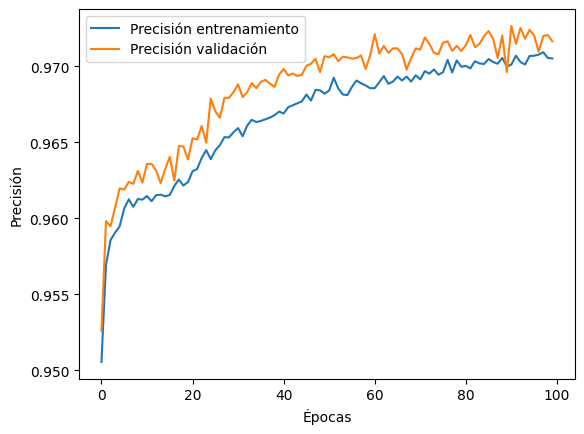

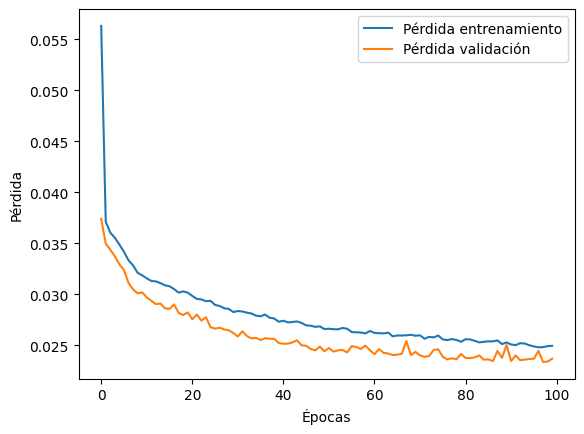

In [ ]:
# Visualizar la precisión
plt.plot(history.history["accuracy"], label= "Precisión entrenamiento")
plt.plot(history.history['val_accuracy'], label= "Precisión validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

# Visualizar la pérdida
plt.plot(history.history['loss'], label= "Pérdida entrenamiento")
plt.plot(history.history['val_loss'], label= "Pérdida validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.show()


##<font color="green">**Evaluación del Modelo**</font>
Evaluamos el rendimiento del modelo en el conjunto de prueba.

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en datos de prueba: {loss}")
print(f"Precisión en datos de prueba: {accuracy}")


740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 0.0241
Pérdida en datos de prueba: 0.023695843294262886
Precisión en datos de prueba: 0.9716470837593079


In [ ]:

from sklearn.metrics import precision_score, recall_score

# Hacemos las predicciones del modelo
y_pred = (model.predict(X_test) > 0.3).astype("int32")

# Calculamos la precisión y el recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Mostramos los resultados
print(f'Precisión: {precision}')
print(f'Recall: {recall}')


740/740 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Precisión: 0.7435610302351624
Recall: 0.5918003565062389


##<font color="green">**Guardar el Modelo para Futuras Predicciones**</font>
Podemos guardar el modelo entrenado para utilizarlo en predicciones futuras.

In [ ]:
# Guardar el modelo
model.save("modelo_rnn_lstm_motor_electrico.h5")

740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


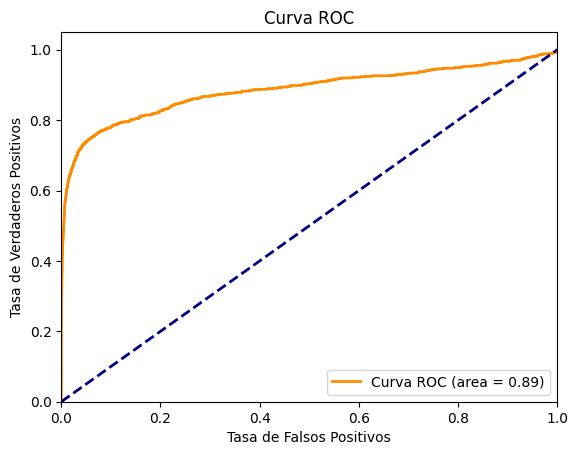

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Calcular los puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color= "darkorange", lw=2, label=f"Curva ROC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color= "navy", lw=2, linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc= "lower right")
plt.show()


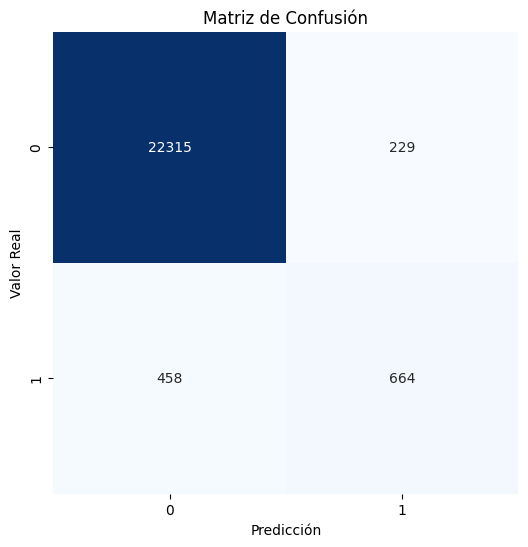

In [ ]:
# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()
